<a href="https://colab.research.google.com/github/montassar-ML/project/blob/main/Decoding_the_Gold_Market_Insights_from_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
gold_data = pd.read_csv('gld_price_data.csv')

# Examine the dataset
print(gold_data.head())
print(gold_data.info())
print(gold_data.describe())

# Check for missing values
print(gold_data.isnull().sum())

# Convert 'Date' column to datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

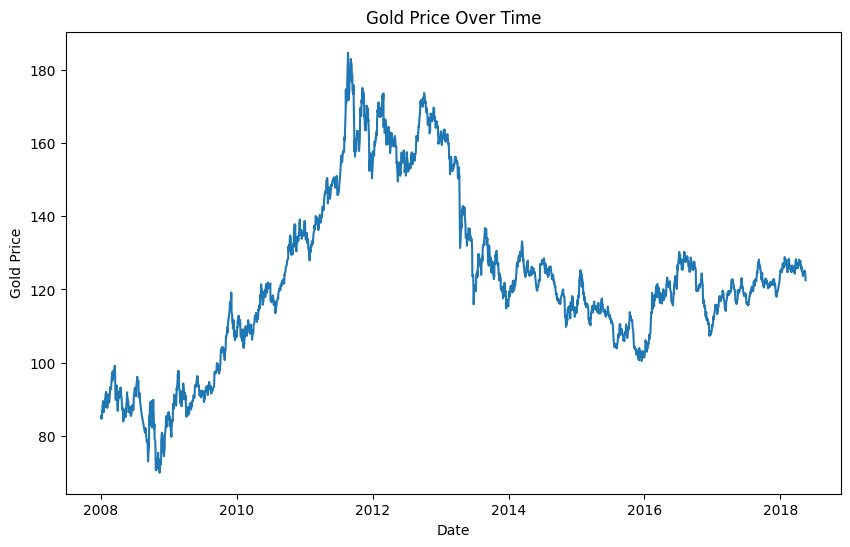

In [14]:
# Perform exploratory data analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='GLD', data=gold_data)
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()



In [15]:
# Analyze correlation between features
correlation_matrix = gold_data.corr()
print(correlation_matrix)



             Date       SPX       GLD       USO       SLV   EUR/USD
Date     1.000000  0.944033  0.209118 -0.782230 -0.174108 -0.794540
SPX      0.944033  1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.209118  0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.782230 -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.174108 -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.794540 -0.672017 -0.024375  0.829317  0.321631  1.000000


In [16]:
# Create new features (if necessary)
gold_data['SMA_50'] = gold_data['GLD'].rolling(window=50).mean()
gold_data['SMA_200'] = gold_data['GLD'].rolling(window=200).mean()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Select relevant features and target variable
features = ['SPX', 'USO', 'SLV', 'EUR/USD', 'SMA_50', 'SMA_200']
target = 'GLD'

X = gold_data[features]
y = gold_data[target]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 15375.8330
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 13673.9297
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 8413.4521
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 2115.6252
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 343.0334
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 281.2090
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 257.2371
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 235.3377
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 215.6826
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 197.1637
Epoch 11/100
58/58 [==============================] - 0s 2ms/step - loss: 180.8970
Epoch 12/100
58/58 [==============================] - 0s 4ms/step - loss: 165.8578
Epoch 1

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

15/15 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 18.57092984432851
Mean Absolute Error (MAE): 3.3998190166793893
R-squared (R2): 0.9661299774245254


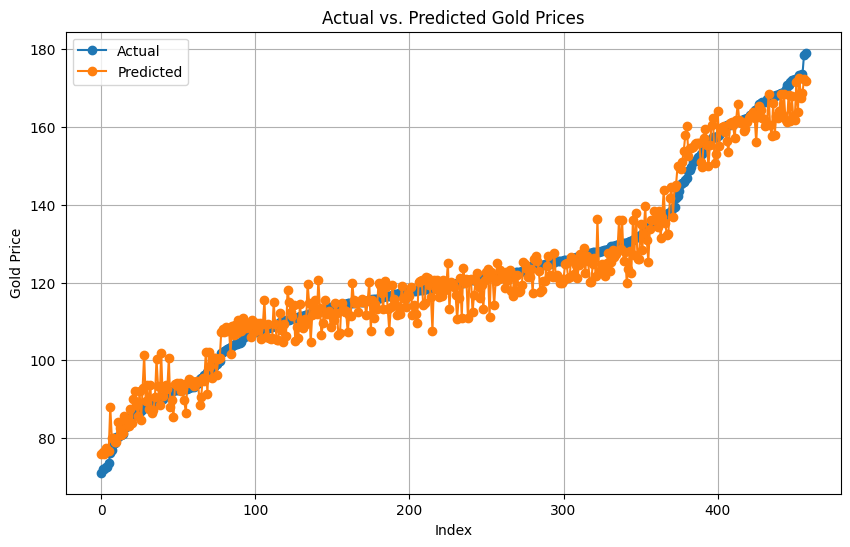

In [30]:
import matplotlib.pyplot as plt

# Create a DataFrame to store the actual and predicted values
comparison_data = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})

# Sort the DataFrame by the actual values
comparison_data = comparison_data.sort_values(by='Actual')

# Reset the index
comparison_data = comparison_data.reset_index(drop=True)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_data.index, comparison_data['Actual'], marker='o', label='Actual')
plt.plot(comparison_data.index, comparison_data['Predicted'], marker='o', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Actual vs. Predicted Gold Prices')
plt.legend()
plt.grid(True)
plt.show()